In [1]:
import numpy as np
import pandas as pd 

In [2]:
dataset = pd.read_csv("Twitter_Hate_Speech.zip")

In [3]:
dataset

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
dataset.info()

In [5]:
dataset.describe()

,count,hate_speech_count,offensive_language_count,neither_count,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [6]:
dataset["label"] = dataset["class"].map({0: "Hate Speech", 1: "Offensive Language", 2: "No Hate or Offensive Language"}) 

In [7]:
dataset

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,label
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No Hate or Offensive Language
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No Hate or Offensive Language
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [8]:
data = dataset[["tweet", "label"]]

In [9]:
# !pip install nltk
import re
import nltk
import string

In [ ]:
nltk.download("stopwords")

In [11]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
stop_words.add("rt")


In [12]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

In [13]:
def clean_data(text):
    text = str(text).lower()
    text = re.sub('https?://\s+|www|.s+','',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>','',text)
    text = re.sub('[%s]' %re.escape(string.punctuation),'',text)
    text = re.sub("\n",'',text)
    text = re.sub('\w*\d\w*', '', text)

    text = [word for word in text.split(' ') if word not in stop_words]
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

In [ ]:
data["tweet"] = data["tweet"].apply(clean_data)

In [15]:
data

,tweet,label
0,mayolov woman youhouldnt complain clean hoe ...,No Hate or Offensive Language
1,boy da coldtyga dwn bad cuffin dat hoe place,Offensive Language
2,urkindofbrand dawg ever fuck bitch andhetart...,Offensive Language
3,cgandeon vivabedh look like tranni,Offensive Language
4,henikarob thehit hear might true might faker ...,Offensive Language
...,...,...
24778,muthafin lie coreyemanuel right h tl trh m...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No Hate or Offensive Language
24780,young buck wanna eat dat nigguh like aint fuckin,Offensive Language
24781,youu got wild bitch tellin li,Offensive Language


In [22]:
X = np.array(data["tweet"])
y = np.array(data["label"])

In [23]:
#!pip install sclkit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [24]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [ ]:
X

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dt.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

In [53]:
acc = accuracy_score(y_test, y_pred)
acc

0.8546277050984228

In [49]:
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

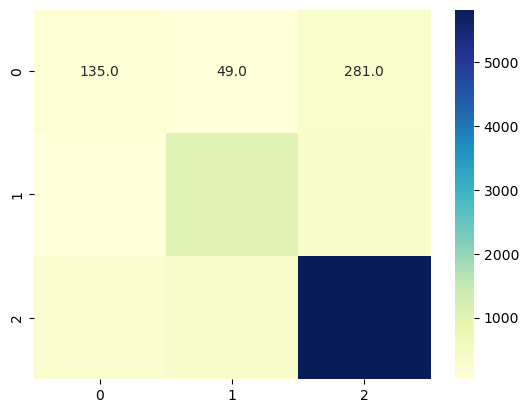

In [52]:
sns.heatmap(cm, annot = True, fmt = ".1f", cmap="YlGnBu")